# BASIC STATISTICS

**Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset**

The goal of this analysis is to perform descriptive analytics and data preprocessing on a Sales & Discounts dataset. The objective is to understand data distribution, identify patterns, detect outliers, and prepare the dataset for deeper analytical tasks such as predictive modeling or trend analysis.


**Descriptive Analytics for Numerical Columns**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("sales_data_with_discounts.csv")


In [18]:
df.isnull().sum()
df = df.fillna(df.median(numeric_only=True))  # or df.dropna()
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", list(numerical_cols))


Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [8]:
df['Model'].unique()

array(['RU-10', 'RU-9 Plus', 'YM-99', 'YM-99 Plus', 'YM-98 ', 'RU-9',
       'S-20', 'S-21', 'O-10', 'O-11', 'Babaji Oil ', 'Vedic Cream',
       'Vedic Shampoo', 'Babaji Shampoo', 'Babaji Cream', 'Vedic Oil',
       'Gear Oil', 'Gear Cream', 'Gear Shampoo', 'Gear BB Cream',
       'M- T Shirts', 'M- Inners', 'W-Casuals', 'W-Inners', 'M-Jeans',
       'M-Casuals', 'W-Western', 'W-Lounge', 'M-Formals', 'M-Shoes'],
      dtype=object)

In [9]:
df['Model'].value_counts()

Model
RU-10             15
RU-9 Plus         15
YM-99             15
YM-99 Plus        15
YM-98             15
RU-9              15
S-20              15
S-21              15
O-10              15
O-11              15
Babaji Oil        15
Vedic Cream       15
Vedic Shampoo     15
Babaji Shampoo    15
Babaji Cream      15
Vedic Oil         15
Gear Oil          15
Gear Cream        15
Gear Shampoo      15
Gear BB Cream     15
M- T Shirts       15
M- Inners         15
W-Casuals         15
W-Inners          15
M-Jeans           15
M-Casuals         15
W-Western         15
W-Lounge          15
M-Formals         15
M-Shoes           15
Name: count, dtype: int64

In [11]:
pd.crosstab(df["BU"],df["Model"])

Model,Babaji Cream,Babaji Oil,Babaji Shampoo,Gear BB Cream,Gear Cream,Gear Oil,Gear Shampoo,M- Inners,M- T Shirts,M-Casuals,...,Vedic Cream,Vedic Oil,Vedic Shampoo,W-Casuals,W-Inners,W-Lounge,W-Western,YM-98,YM-99,YM-99 Plus
BU,,,,,,,,,,,,,,,,,,,,,
FMCG,15,15,15,15,15,15,15,0,0,0,...,15,15,15,0,0,0,0,0,0,0
Lifestyle,0,0,0,0,0,0,0,15,15,15,...,0,0,0,15,15,15,15,0,0,0
Mobiles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15,15,15


In [14]:
model_volume = df.groupby('Model')['Volume'].sum()

In [16]:
brand_volume =df.groupby('Brand')['Volume'].sum()

In [20]:
Brand_Sales = df.groupby("Brand")['Total Sales Value'].sum()

In [21]:
Brand_Sales = df.groupby("Brand")['Total Sales Value'].sum()

Brand
Babaji      176090
Gear        107417
Jeera       516469
Orange     3911800
RealU      3070400
Sumsang    3572000
Vedic       113700
Viva        382000
YouM       3365900
Name: Total Sales Value, dtype: int64

In [4]:
# Compute statistics
desc_stats = df[numerical_cols].describe().T
desc_stats['mode'] = [df[col].mode()[0] for col in numerical_cols]
print(desc_stats[['mean', '50%', 'mode', 'std']].rename(columns={'50%': 'median'}))

                           mean       median          mode           std
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


**Data Visualization**
**a. Histograms**

Objective: To examine data distributions and detect skewness or outliers.

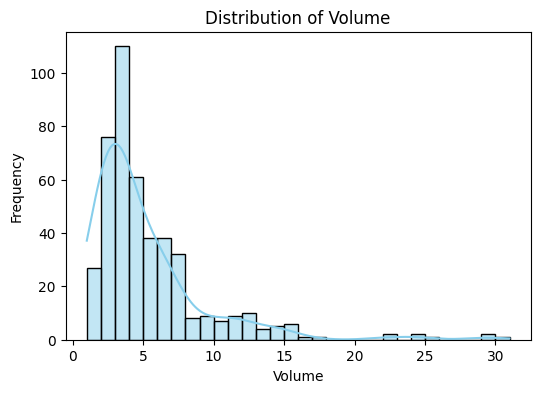

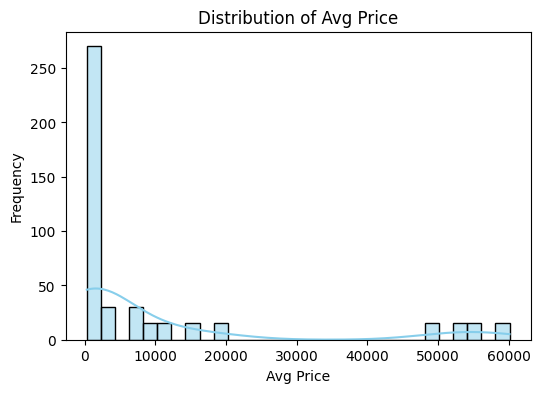

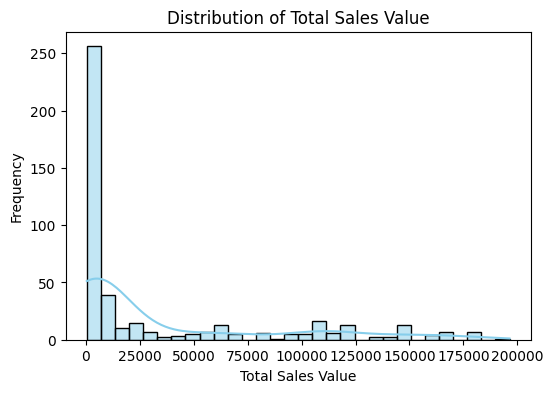

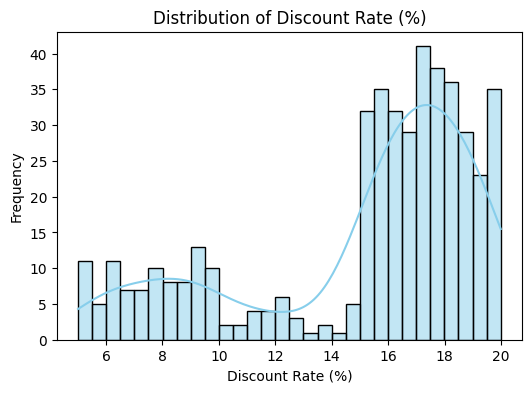

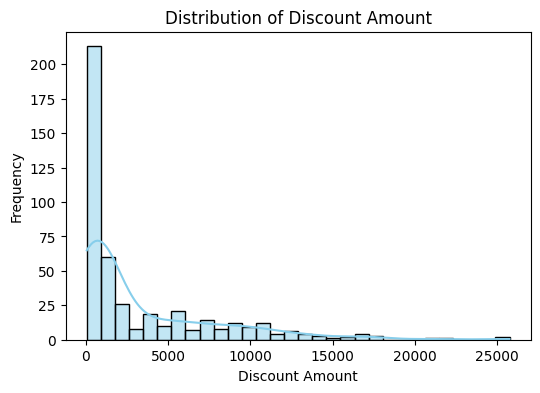

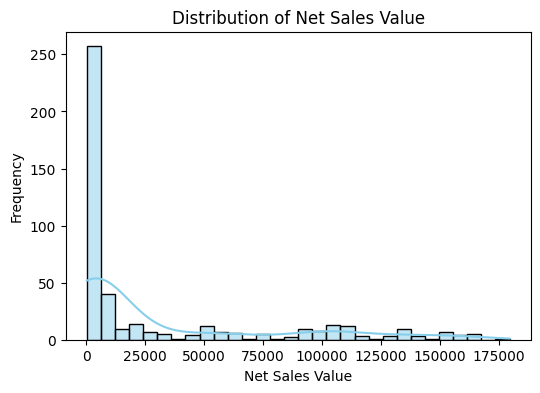

In [5]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**b. Box Plots**

Objective: Identify outliers and visualize interquartile range (IQR).

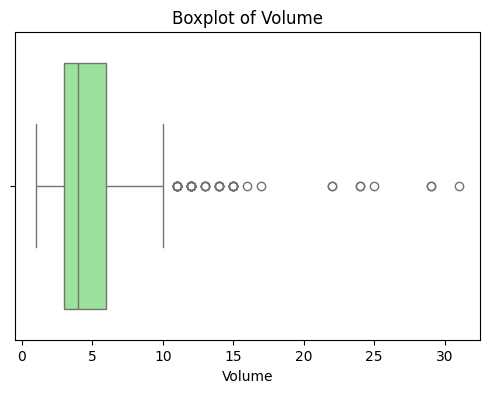

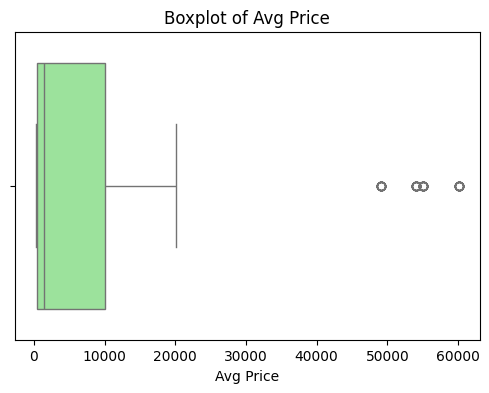

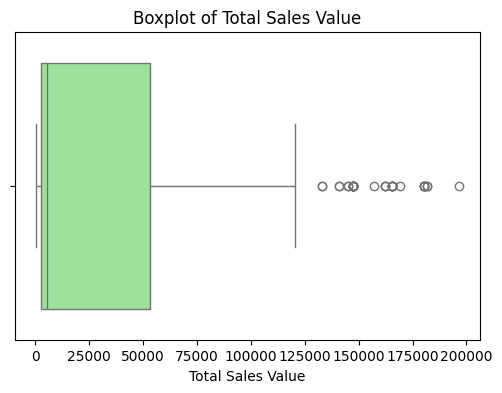

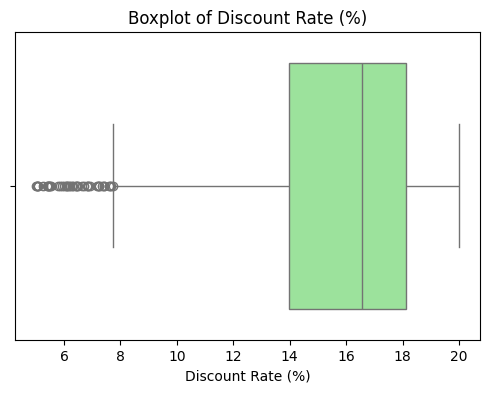

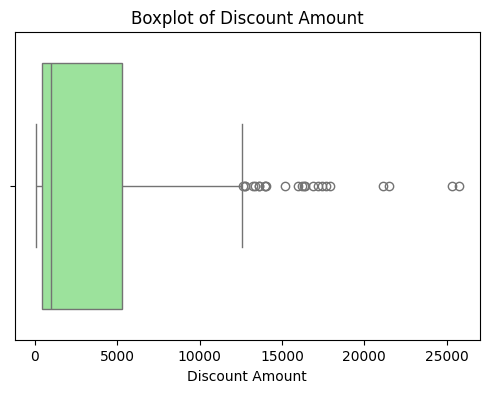

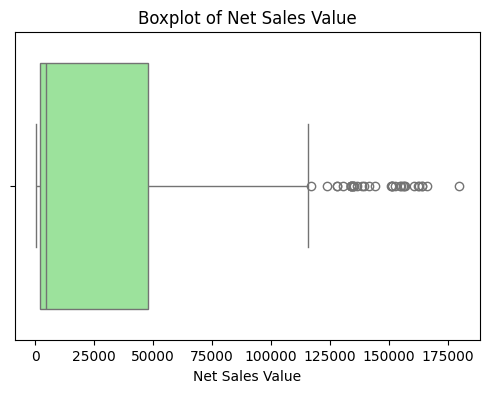

In [6]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

**3 Bar Charts (Categorical Variables)**

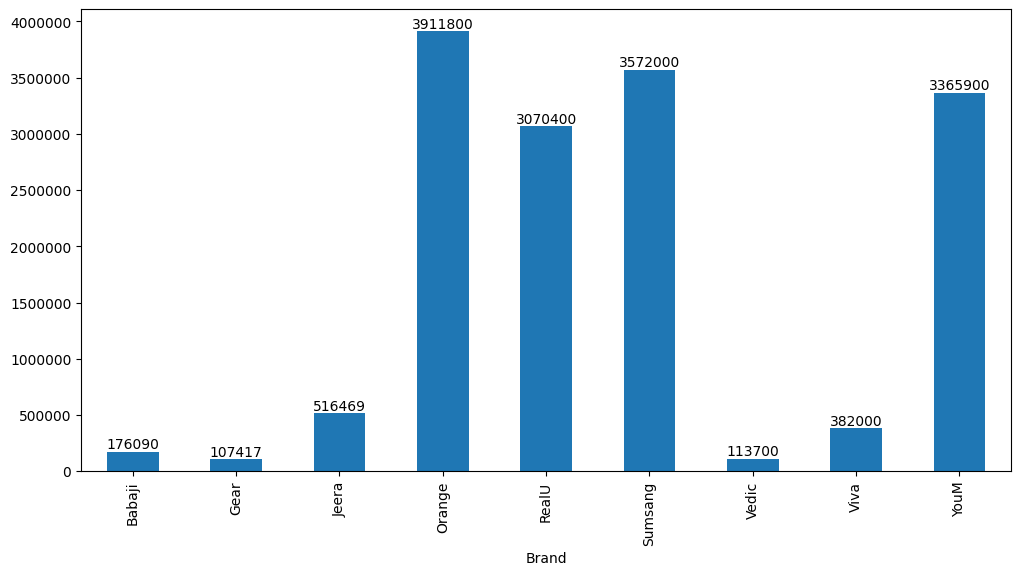

In [24]:
ax = Brand_Sales.plot(kind='bar', figsize=(12, 6))
ax.ticklabel_format(style='plain', axis='y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

In [31]:
Day_Sales = df.groupby("Day")['Total Sales Value'].sum()

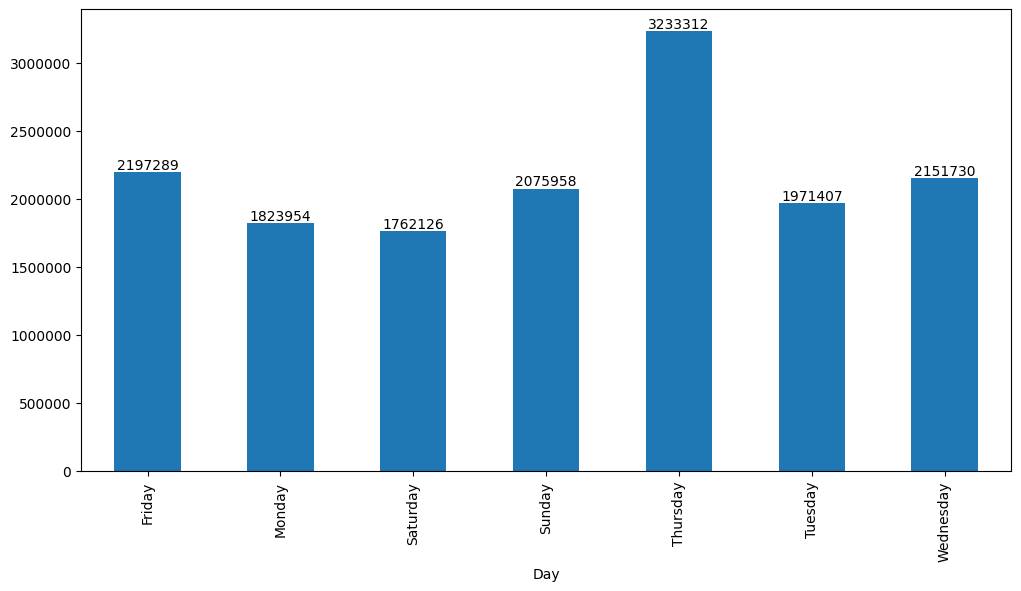

In [32]:
ax = Day_Sales.plot(kind='bar', figsize=(12, 6))
ax.ticklabel_format(style='plain', axis='y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

Histograms:

Most numerical variables show right-skewed distributions, meaning many small-value sales and fewer high-value ones.

Discount Rate appears roughly normally distributed.

Boxplots:

Presence of outliers in Total Sales Value, Discount Amount, and Net Sales Value — likely large sales or high-end products.

Bar Charts:

Days: Sales occur evenly across weekdays except Thursday.

BU, Brand, Model: Certain brands dominate — Orange, YouM and Sumsang.

Conclusion

Sales data show high variability across price and volume.

Discounts are moderate but impactful, particularly for high-value transactions.

Some outliers represent exceptional sales or promotions.

Categorical analysis highlights brand and city-level differences useful for targeted strategy.